In [ ]:
# clasification model -> evaluation

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
import os
os.getcwd()

'/Users/punchh_adityas/Desktop/python/9th_oct_22'

In [3]:
%matplotlib inline 
# Magic command of matplotlib

In [4]:
y_test=[1,1,1,0,0,
       1,1,1,1,1,
       1,1,1,1,1,
       1,1,1,1,1]
pred=[1,1,1,0,0,
      1,1,1,1,1,
       1,1,1,1,1,
       1,1,1,1,1]

# In true data set 18 patient has disease, 
#2 patient has NO Disease

In [5]:
# Confusion matrix
cm = confusion_matrix(y_test, pred)
cm

array([[ 2,  0],
       [ 0, 18]])

Text(50.722222222222214, 0.5, 'True Value')

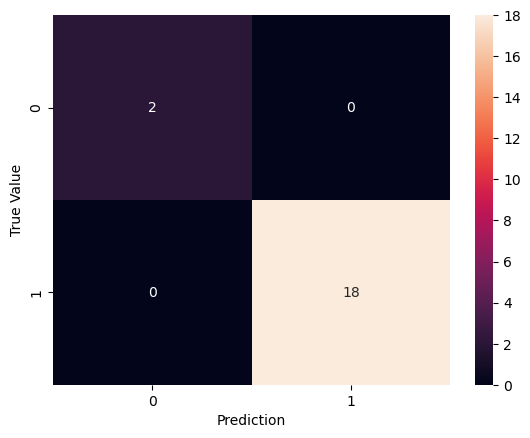

In [6]:
# Heatmap of confusion matrix
sns.heatmap(cm, annot=True)
plt.xlabel("Prediction")
plt.ylabel("True Value")

In [7]:
y_test=[1,1,1,0,0,
       1,1,1,1,0,
       1,1,1,1,1,
       1,1,1,1,1]
pred=[1,1,1,0,0,
      1,1,1,1,1,
       1,1,1,1,1,
       0,0,0,0,0]

# In true data set 17 patient has disease, 
# 3 patient has NO Disease

In [8]:
cm = confusion_matrix(y_test, pred)
cm

array([[ 2,  1],
       [ 5, 12]])

Text(50.722222222222214, 0.5, 'True Value')

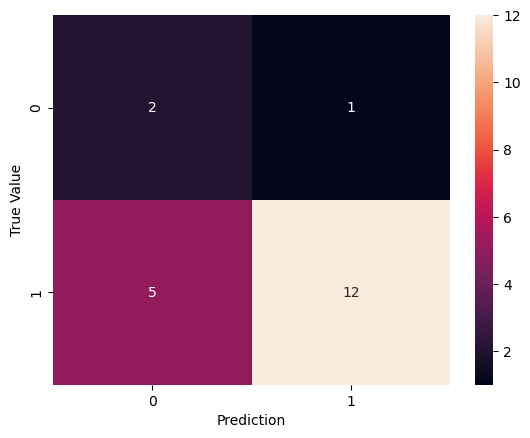

In [9]:
# Heatmap of confusion matrix
sns.heatmap(cm, annot=True)
plt.xlabel("Prediction")
plt.ylabel("True Value")

In [12]:
# Recall, precision, specificity, sensitivity,accuracy

In [10]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.29      0.67      0.40         3
           1       0.92      0.71      0.80        17

    accuracy                           0.70        20
   macro avg       0.60      0.69      0.60        20
weighted avg       0.83      0.70      0.74        20



In [16]:
# Recall = sensitivity = TP/(TP+FN) : True positive rate # Recall — What percent of the positive cases did you catch?

# Precision = TP/(TP+FP) # Precision — What percent of your predictions were correct?

# accuracy = (TP + TN)/(TP + TN + FP + FN)

# Specificity = True negative rate

# Total mis classification: The total % of incorrect classification

# F1 score is the harmonic mean of precision and recall # F1 score — What percent of positive predictions were correct?
# f1_score = 2*precision*recall/(precision+recall)

In [11]:
TN,FP, FN,TP = cm.ravel()

In [18]:
print(TN,FP, FN,TP)

2 3 0 15


In [12]:
cm

array([[ 2,  1],
       [ 5, 12]])

In [ ]:
# ROC AUC curve

In [13]:
y_test = [0,0,0,0,1,0,0,0,0,1]

In [14]:
proba_score_positive_class = [0.5, 0.4, 0.35, 0.8, 0.7, 0.5, 0.3, 0.1, 0.2, 0.9]

In [17]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, proba_score_positive_class, pos_label = 1)

In [18]:
print("FPR", fpr)
print("TPR", tpr)
print("Threshold Value", threshold)

FPR [0.    0.    0.125 0.125 0.375 1.   ]
TPR [0.  0.5 0.5 1.  1.  1. ]
Threshold Value [1.9 0.9 0.8 0.7 0.5 0.1]


In [19]:
from sklearn.metrics import roc_auc_score

In [20]:
auc_score = roc_auc_score(y_test, proba_score_positive_class)

In [21]:
auc_score

0.9375

In [23]:
# Lable encodeing 

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
import os
os.getcwd()

'/Users/punchh_adityas/Desktop/python/9th_oct_22'

In [25]:
df = pd.read_csv("../datasets/label_encoder.csv")

In [26]:
df.head()

,Unnamed: 0,Dept,Age,Experience,Salary,Education
0,0,HR,32.000000,9.5,13.5,Under_Graduate
1,1,HR,33.000000,12.0,13.5,Master
2,2,IT,35.000000,12.0,13.5,Master
3,3,IT,37.333333,12.0,13.5,Graduate
4,4,HR,34.000000,11.0,13.5,Graduate


In [27]:
df1 = df.drop(["Unnamed: 0"], axis=1)

In [28]:
df1.head()

,Dept,Age,Experience,Salary,Education
0,HR,32.000000,9.5,13.5,Under_Graduate
1,HR,33.000000,12.0,13.5,Master
2,IT,35.000000,12.0,13.5,Master
3,IT,37.333333,12.0,13.5,Graduate
4,HR,34.000000,11.0,13.5,Graduate


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        33 non-null     object 
 1   Age         33 non-null     float64
 2   Experience  33 non-null     float64
 3   Salary      33 non-null     float64
 4   Education   33 non-null     object 
dtypes: float64(3), object(2)
memory usage: 1.4+ KB


In [30]:
df1["Dept"].value_counts()

HR           15
IT            8
Sales         6
Marketing     4
Name: Dept, dtype: int64

In [31]:
df1["Education"].value_counts()

Master            16
Under_Graduate     9
Graduate           8
Name: Education, dtype: int64

In [32]:
df2 = df1.copy()

# First approach using astype 

In [38]:
df2["Dept"] = df2["Dept"].astype("category")

In [33]:
df2

,Dept,Age,Experience,Salary,Education
0,HR,32.000000,9.5,13.5,Under_Graduate
1,HR,33.000000,12.0,13.5,Master
2,IT,35.000000,12.0,13.5,Master
3,IT,37.333333,12.0,13.5,Graduate
4,HR,34.000000,11.0,13.5,Graduate
5,IT,33.000000,13.0,13.5,Master
6,Marketing,56.000000,12.0,13.5,Master
7,HR,37.333333,10.0,13.5,Master
8,Marketing,31.000000,12.0,13.5,Under_Graduate
9,IT,45.000000,13.5,13.5,Master


In [39]:
df2["Dept"] = df2["Dept"].cat.codes

In [40]:
df2.head()

,Dept,Age,Experience,Salary,Education
0,0,32.000000,9.5,13.5,Under_Graduate
1,0,33.000000,12.0,13.5,Master
2,1,35.000000,12.0,13.5,Master
3,1,37.333333,12.0,13.5,Graduate
4,0,34.000000,11.0,13.5,Graduate


In [42]:
df2["Education"] = df2["Education"].astype("category").cat.codes

In [43]:
df2.head()

,Dept,Age,Experience,Salary,Education
0,0,32.000000,9.5,13.5,2
1,0,33.000000,12.0,13.5,1
2,1,35.000000,12.0,13.5,1
3,1,37.333333,12.0,13.5,0
4,0,34.000000,11.0,13.5,0


In [41]:
df3 = df1.copy()

# Second approach using Label Encoder

In [37]:
from sklearn import preprocessing


In [39]:
label = preprocessing.LabelEncoder()

In [40]:
df3["Dept"] = label.fit_transform(df3["Dept"])

In [41]:
df3.head()

,Dept,Age,Experience,Salary,Education
0,0,32.000000,9.5,13.5,Under_Graduate
1,0,33.000000,12.0,13.5,Master
2,1,35.000000,12.0,13.5,Master
3,1,37.333333,12.0,13.5,Graduate
4,0,34.000000,11.0,13.5,Graduate


In [42]:
df3["Education"] = label.fit_transform(df3["Education"])

In [43]:
df3.head()

,Dept,Age,Experience,Salary,Education
0,0,32.000000,9.5,13.5,2
1,0,33.000000,12.0,13.5,1
2,1,35.000000,12.0,13.5,1
3,1,37.333333,12.0,13.5,0
4,0,34.000000,11.0,13.5,0


# One hot encoding

In [44]:
# one hot encoding will increase the dimention but all values will be zeros or one

In [45]:
df4 = df1.copy()

In [46]:
df2.head()

,Dept,Age,Experience,Salary,Education
0,0,32.000000,9.5,13.5,2
1,0,33.000000,12.0,13.5,1
2,1,35.000000,12.0,13.5,1
3,1,37.333333,12.0,13.5,0
4,0,34.000000,11.0,13.5,0


In [47]:
df4 = pd.get_dummies(df4, columns = ["Dept", "Education"])

In [48]:
df4.head()

,Age,Experience,Salary,Dept_HR,Dept_IT,Dept_Marketing,Dept_Sales,Education_Graduate,Education_Master,Education_Under_Graduate
0,32.000000,9.5,13.5,1,0,0,0,0,0,1
1,33.000000,12.0,13.5,1,0,0,0,0,1,0
2,35.000000,12.0,13.5,0,1,0,0,0,1,0
3,37.333333,12.0,13.5,0,1,0,0,1,0,0
4,34.000000,11.0,13.5,1,0,0,0,1,0,0


In [49]:
# Dropping the dummy column because we are not learning a new info

In [50]:
df4 = df4.drop(["Dept_HR", "Education_Master"], axis=1)

In [51]:
df4.head()

,Age,Experience,Salary,Dept_IT,Dept_Marketing,Dept_Sales,Education_Graduate,Education_Under_Graduate
0,32.000000,9.5,13.5,0,0,0,0,1
1,33.000000,12.0,13.5,0,0,0,0,0
2,35.000000,12.0,13.5,1,0,0,0,0
3,37.333333,12.0,13.5,1,0,0,1,0
4,34.000000,11.0,13.5,0,0,0,1,0
